Build the Image classification model by dividing the model into following 4 stages:
a. Loading and preprocessing the image data
b. Defining the model’s architecture
c. Training the model
d. Estimating the model’s performance

In [7]:
# Importing TensorFlow, a deep learning library used for building and training models
import tensorflow as tf

# Importing essential modules from Keras for building and structuring the neural network model
from keras.models import Sequential           # Sequential model allows stacking layers in order
from keras.layers import Dense, Conv2D,  Dropout, Flatten, MaxPooling2D
# Importing matplotlib for visualizing data, such as training and validation loss/accuracy plots
import matplotlib.pyplot as plt

# Importing NumPy for numerical operations and handling data arrays
import numpy as np


In [8]:
# A) Loading and Pre-processing the Image Data

# Loading the MNIST dataset from TensorFlow. This dataset consists of 28x28 grayscale images of handwritten digits (0-9).
mnist = tf.keras.datasets.mnist

# Splitting the dataset into training and testing data.
# (x_train, y_train) contains the images and labels for the training set.
# (x_test, y_test) contains the images and labels for the testing set.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the data to fit the input shape expected by the model.
# The model expects input of shape (batch_size, height, width, channels).
# The original shape of x_train is (number_of_samples, 28, 28) – 28x28 images.
# We add the channel dimension, making it (number_of_samples, 28, 28, 1), 
# where '1' indicates that the images are grayscale.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Converting pixel values from integers to floats and normalizing the data.
# MNIST images have pixel values between 0 and 255, and we scale them to a range of 0 to 1 
# by dividing by 255. This helps the neural network learn more effectively.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Printing the shape of the training data to verify the changes.
# The output will show the shape of the x_train dataset, which is now (num_samples, 28, 28, 1),
# where num_samples is the number of training images (60,000 for MNIST).
print("Shape of Training data:", x_train.shape)


Shape of Training data: (60000, 28, 28, 1)


In [16]:
# B) Defining the Model's Architecture

# Initialize the Sequential model (stacking layers in order)
model = Sequential()

# Convolutional layer: 28 filters of size 3x3, 'relu' activation for feature extraction
model.add(Conv2D(28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

# Max pooling layer: 2x2 pooling to reduce spatial dimensions (downsampling)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer: Converts 2D output to 1D array for fully connected layers
model.add(Flatten())

# Dense layer: 200 neurons, 'relu' activation to interpret features
model.add(Dense(200, activation="relu"))


# Dropout layer: 30% dropout to prevent overfitting during training
model.add(Dropout(0.3))

# Dense output layer: 10 neurons (one per class), 'softmax' activation for class probabilities
model.add(Dense(10, activation="softmax"))

# Display the model summary to view the architecture and parameters
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 200)               946600    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                2010      
                                                      

In [10]:
# C) Training the Model

# Compile the model with Adam optimizer, loss function, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 2 epochs using training data
model.fit(x_train, y_train, epochs=2)



Epoch 1/2


1875/1875 [==============================] - 29s 14ms/step - loss: 0.1740 - accuracy: 0.9480
Epoch 2/2
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0635 - accuracy: 0.9807


In [11]:
# D) Evaluating the Model

# Evaluate the model on the test data and get the loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test loss and accuracy
print("Test Loss: {:.3f}".format(test_loss))
print("Test Accuracy: {:.3f}".format(test_acc))


313/313 [==============================] - 1s 3ms/step - loss: 0.0485 - accuracy: 0.9835
Test Loss: 0.049
Test Accuracy: 0.984


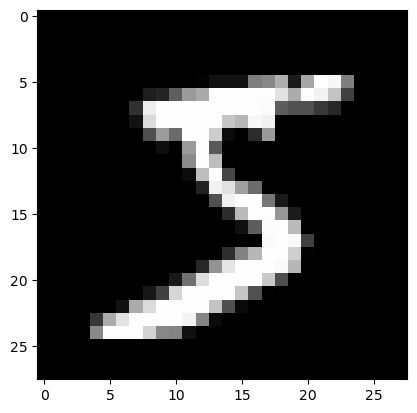

In [12]:
# E) Displaying an Image from the Dataset

# Set the index of the image to display (0 corresponds to the first image in the training set)
image_index = 0

# Get the image at the specified index
image = x_train[image_index]

# Display the image using matplotlib, with grayscale colormap
plt.imshow(np.squeeze(image), cmap="gray")
plt.show()


In [13]:
# F) Predicting the Class of the Image

# Reshape the image to match the input shape expected by the model (1 image, 28x28, 1 channel)
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

# Predict the class of the image using the trained model
prediction = model.predict(image)

# Print the predicted class (the index of the highest probability in the prediction)
print("Predicted class:", np.argmax(prediction))


1/1 [==============================] - 0s 161ms/step
Predicted class: 5
